In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
# Loading the data
df = pd.read_excel('/content/Hampshire Trust Bank Case Study.xlsx', sheet_name='data')
df


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
0,123A038,2016-05-12,1,91,120,29,0,0.3663,5,1137,0,0,0,-2,2
1,123A054,2016-06-28,1,90,360,270,0,0.6032,56,786,0,8,0,74,1
2,123A118,2016-07-29,1,89,120,31,0,0.5527,.,1324,0,3,0,1,1
3,123A150,2017-02-06,0,82,360,278,0,0.3748,.,1300,0,0,0,2,1
4,123A310,2016-06-08,0,90,300,210,30,0.5409,.,727,121,0,47,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,A050641,2022-03-29,1,21,240,219,0,0.6172,49,1145,0,0,0,-2,1
1995,A051097,2022-03-31,0,21,360,339,0,0.5750,.,1608,0,0,0,2,1
1996,A051126,2022-03-25,1,21,240,219,0,0.7942,73,1217,0,0,0,5,1
1997,A051134,2022-04-01,1,20,300,280,0,0.6632,78,1377.5,0,1,0,2,1


Seeing '.' in place of missings, we will have to convert to np.nan as pyhton '.' as string.

In [ ]:
#replacing . with nans
df.replace('.', np.nan, inplace=True)


Seeing that the dataset has a variable Company/Individual_Flag, I proceed the data quality checks after splitting them into two datasets Company and Individual independently (as they will be modelled independently as well)

In [ ]:
# Split the data into company and individual accounts
company_accounts = df[df['Company/Individual_Flag'] == 1]
individual_accounts = df[df['Company/Individual_Flag'] == 0]


# Company Application

In [ ]:
company_accounts

,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
0,123A038,2016-05-12,1,91,120,29,0,0.3663,5.0,1137.000000,0.0,0.0,0.0,-2.0,2
1,123A054,2016-06-28,1,90,360,270,0,0.6032,56.0,786.000000,0.0,8.0,0.0,74.0,1
2,123A118,2016-07-29,1,89,120,31,0,0.5527,NaN,1324.000000,0.0,3.0,0.0,1.0,1
5,123AA9,2016-12-21,1,84,120,36,30,0.4818,69.0,1259.666667,0.0,0.0,0.0,19.0,2
6,123A425,2017-04-07,1,80,120,40,0,0.7563,78.0,1137.000000,0.0,3.0,0.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,A051070,2022-03-31,1,21,120,99,0,0.7382,70.0,1037.500000,0.0,1.0,0.0,17.0,1
1994,A050641,2022-03-29,1,21,240,219,0,0.6172,49.0,1145.000000,0.0,0.0,0.0,-2.0,1
1996,A051126,2022-03-25,1,21,240,219,0,0.7942,73.0,1217.000000,0.0,0.0,0.0,5.0,1
1997,A051134,2022-04-01,1,20,300,280,0,0.6632,78.0,1377.500000,0.0,1.0,0.0,2.0,1


In [ ]:
# Get the number of cases in each stage for company accounts
company_stage_counts = company_accounts['Stage'].value_counts()
print("\nNumber of cases in each stage for company accounts:\n", company_stage_counts)



Number of cases in each stage for company accounts:
 Stage
1     1140
2      147
3       18
10       1
11       1
Name: count, dtype: int64


First thing that comes to notice is that we have Stage 1, Stage 2, Stage3 and even Stage 10 & 11 which do not exist. That is a Data Quality issue. Lets view the cases of Stage 10 and 11

In [ ]:
stage_10_11_cases = company_accounts[company_accounts['Stage'].isin([10, 11])]
stage_10_11_cases


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
1169,A039688,2021-02-26,1,34,120,86,0,0.4483,56.0,-999.0,-1.0,0.0,-1.0,-1.0,10
1966,A050713,2022-04-01,1,20,360,340,0,0.7117,80.0,1176.0,0.0,1.0,0.0,5.0,11


Upon examaning the two cases, all the performance metrics Days_in_arrers,Loan_to_Value,	Credit_Score,	Account_Management_Score,	County_Court_Judgement,	Number_of_Searches_in_Last_Month,	Public_Information_Sources	,Consumer_Indebtedness_Index, seem to be indicating a decent performance

( assuming that -999 account_management_score means that we don't have any information for that account, assuming the same for -1 County_Court_Judgement,Public_Information_Sources and Consumer_Indebtedness_Index)

Assuming a decent performance it can be safe to say that stage 10/11 are stage 1's and it might just be a data processing error (or a data input error) so I will assume them to be stage 1.

In [ ]:
# Replacing Stage 10 and 11 with Stage 1 in company_accounts and checking again
company_accounts['Stage'] = company_accounts['Stage'].replace({10: 1, 11: 1})
company_stage_counts = company_accounts['Stage'].value_counts()
company_stage_counts


<ipython-input-8-d04bc2808a63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_accounts['Stage'] = company_accounts['Stage'].replace({10: 1, 11: 1})


,count
Stage,
1,1142
2,147
3,18


Lets start the data quality test on Company data first.

In [ ]:
# Checking for missing values in company accounts
company_missing_values = company_accounts.isnull().sum()
print("Missing Values in Company accounts:")
print(company_missing_values)



Missing Values in Company accounts:
Account_ID                             0
Loan_Date                              0
Company/Individual_Flag                0
Cumulative_Months_on_Book              0
Months_on_Book                         0
Remaining_Months_on_Book               0
Days_in_Arrears                        0
Loan_to_Value                          0
Credit_Score                          70
Account_Management_Score             144
County_Court_Judgement               144
Number_of_Searches_in_Last_Month     144
Public_Information_Sources           144
Consumer_Indebtedness_Index          144
Stage                                  0
dtype: int64


There are many missings, lets get these figures by Stages

In [ ]:
# Group by Stage and calculating missing values
company_missing_by_stage = company_accounts.groupby('Stage').apply(lambda x: x.isnull().sum())
print("Missing Values in Company accounts by Stage:\n")
company_missing_by_stage

Missing Values in Company accounts by Stage:



,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
Stage,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,54,136,136,136,136,136,0
2,0,0,0,0,0,0,0,0,13,7,7,7,7,7,0
3,0,0,0,0,0,0,0,0,3,1,1,1,1,1,0




All the missing values seem to be in variables which I assume have been take from extrenal sources. Account_Management_Score (seems like an internal data metric but as the number of missings is exactly the same as the rest of the variables I go ahead assuming it is an external data source)

*   The maximum missings are in Stage 1( which is being considered as non-default, and are considered lower risk as compared to stage 2 (non-defaults) & stage 3).
*   Stage 2 has 13 cases for missing credit score and 7 cases for rest of the external sources
*   Stage 3 having the least missings with 3 cases for Credit score and 1 case for the rest of external sources.

Given that we have 1142 stage 1 cases for companies, dropping the missings in stage 1 seems fair to do.

Lets explore Stage 2 and 3 cases ( and see if we find a pattern )



In [ ]:
# cases of missings in stage 2 by variables
stage_2_missing = company_accounts[
    (company_accounts['Stage'] == 2) &
    (company_accounts.isnull().any(axis=1))
]


print("No of cases with missing in Stage 2:",len(stage_2_missing)," No of total cases in stage 2", len(company_accounts[company_accounts["Stage"]==2]))
print("Cases with missing values in Stage 2:\n")
stage_2_missing


No of cases with missing in Stage 2: 19  No of total cases in stage 2 147
Cases with missing values in Stage 2:



,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
571,A030480,2019-11-14,1,49,120,71,29,0.5953,NaN,894.0,0.000000,5.0,0.0,43.0,2
572,A030499,2019-11-14,1,49,96,47,30,0.6325,NaN,894.0,0.000000,5.0,0.0,43.0,2
660,A031889,2020-02-24,1,46,60,14,0,0.6933,NaN,671.0,-0.333333,1.0,-1.0,2.0,2
749,A033235,2020-05-28,1,43,120,77,30,0.5797,12.0,NaN,NaN,NaN,NaN,NaN,2
898,A035580,2020-10-22,1,38,27,-11,0,0.0000,NaN,1757.0,0.000000,0.0,0.0,1.0,2
922,A035943,2020-10-30,1,38,60,22,0,0.5988,33.0,NaN,NaN,NaN,NaN,NaN,2
974,A036778,2020-11-30,1,37,360,323,0,0.5125,15.0,NaN,NaN,NaN,NaN,NaN,2
1021,A037447,2021-02-03,1,34,120,86,120,0.6375,NaN,-999.0,-1.000000,0.0,-1.0,-1.0,2
1047,A037762,2021-01-08,1,35,360,325,0,0.5509,NaN,-999.0,-1.000000,0.0,-1.0,-1.0,2
1072,A038116,2021-01-13,1,35,120,85,60,0.5846,NaN,-134.5,-0.500000,0.0,-1.0,29.0,2


Examining the above that 1 thing that immediately comes ot light is the account A035580 ( has all external values as 0) which has -11 months on book and has 0 loan to value, so it can be dropped immediately as I assume they have already repaid the loan.

Upon examining the data no proper pattern seem to exist where missings occour in stage 2, hence of simplicity in this exercise I will be dropping the variables as I feel that imputing values may not capture the randnomess of these variables and may skew or give the model a bias or just decerease it's performance.

That makes the count 147 decrease by 19 = 128, which is a difference greater than 10% in it's size ( but again done for simplicity, and is an issue and with access to the datasources or data source owners might be mitigated )

In [ ]:
# cases of missings in stage 3 by variables
stage_3_missing = company_accounts[
    (company_accounts['Stage'] == 3) &
    (company_accounts.isnull().any(axis=1))
]


print("No of cases with missing in Stage 3:",len(stage_3_missing)," No of total cases in stage 3", len(company_accounts[company_accounts["Stage"]==3]))
print("Cases with missing values in Stage 3:\n")
stage_3_missing


No of cases with missing in Stage 3: 4  No of total cases in stage 3 18
Cases with missing values in Stage 3:



,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
111,A015723,2018-02-09,1,70,60,-10,0,0.6326,NaN,998.5,0.0,1.0,0.0,3.0,3
771,A033657,2020-07-08,1,41,120,79,747,0.2455,NaN,976.5,499.5,0.0,0.0,4.0,3
1059,A037949,2020-12-23,1,36,120,84,690,0.0893,NaN,976.5,499.5,0.0,0.0,4.0,3
1112,A038730,2021-02-17,1,34,120,86,660,0.7041,0.0,NaN,NaN,NaN,NaN,NaN,3


In case of A038730 account it has credit score of 0 and all other externals as missings, so best would be to drop this case.


*In case of A015723 the account has -10 remanining_months_on_book and days in arrears is 0, so I am assuming the loan to value should have been 0 and 63.2% is posibbly an error and I will impute this one as well.*  

Will take care of the negative remaining_months_on_book when looking at the descriptive stats.



The other two cases are very similar hence I will imputing them using the mean of the credit score of stage 3 records. ( other methods might be better but will increase the complexity given so few stage 3 data points )

This results our stage3 cases to go from 18 to 17 which is also a siginificant reduction and should be tried to avoid by re-verifying with the data source or data source owner (but I will drop the one case to proceed further, as imputing might not be the best way forwards for reasons mentioned in stage 2)

In [ ]:
#dropping rows with missing values in Stage 1 or 2
company_accounts_1 = company_accounts[
    ~((company_accounts['Stage'].isin([1, 2])) &
      company_accounts.isnull().any(axis=1))
]
# Drop the stage 3 cases with account IDs 'A038730'
company_accounts_1 = company_accounts_1[~company_accounts_1['Account_ID'].isin(['A038730'])]

company_stage_counts = company_accounts_1['Stage'].value_counts()
company_stage_counts

,count
Stage,
1,961
2,128
3,17


In [ ]:
# Selecting the rows with missing values in Stage 3
stage_3_missing = company_accounts_1[
    (company_accounts_1['Stage'] == 3) &
    (company_accounts_1.isnull().any(axis=1))
]

# mean of the 'Credit_Score' for Stage 3
credit_score_mean = company_accounts_1[company_accounts_1['Stage'] == 3]['Credit_Score'].mean()

# Impute the missing 'Credit_Score' values with the mean
stage_3_missing['Credit_Score'].fillna(credit_score_mean, inplace=True)

# Updating the original DataFrame with the imputed values
company_accounts_1.update(stage_3_missing)


<ipython-input-14-8c0099b701c8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_3_missing['Credit_Score'].fillna(credit_score_mean, inplace=True)


In [ ]:
stage_3_missing

,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
111,A015723,2018-02-09,1,70,60,-10,0,0.6326,19.285714,998.5,0.0,1.0,0.0,3.0,3
771,A033657,2020-07-08,1,41,120,79,747,0.2455,19.285714,976.5,499.5,0.0,0.0,4.0,3
1059,A037949,2020-12-23,1,36,120,84,690,0.0893,19.285714,976.5,499.5,0.0,0.0,4.0,3


In [ ]:
# Group by Stage and calculate missing values
company_missing_by_stage = company_accounts_1.isnull().sum()
print("Missing Values in Company accounts after the data cleaning:\n",company_missing_by_stage)


Missing Values in Company accounts after the data cleaning:
 Account_ID                           0
Loan_Date                            0
Company/Individual_Flag              0
Cumulative_Months_on_Book            0
Months_on_Book                       0
Remaining_Months_on_Book             0
Days_in_Arrears                      0
Loan_to_Value                        0
Credit_Score                         0
Account_Management_Score             0
County_Court_Judgement               0
Number_of_Searches_in_Last_Month     0
Public_Information_Sources           0
Consumer_Indebtedness_Index          0
Stage                                0
dtype: int64


In [ ]:
stage_counts = company_accounts_1['Stage'].value_counts()
print("\nNumber of cases in each stage for company accounts:\n", stage_counts)



Number of cases in each stage for company accounts:
 Stage
1    961
2    128
3     17
Name: count, dtype: int64


Now after dealing with missing, now onto the descriptive stats for company accounts

In [ ]:
#  descriptive statistics for numeric columns after handling missing values
summary_stats = company_accounts_1.describe()
print("\nSummary Statistics:")
summary_stats


Summary Statistics:


,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
count,1106,1106.0,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000
mean,2020-08-15 19:56:31.681735936,1.0,40.029837,173.541591,133.511754,6.000000,0.623254,46.904934,834.451115,4.371775,1.060579,0.247740,9.861664,1.146474
min,2016-05-12 00:00:00,1.0,15.000000,24.000000,-10.000000,0.000000,0.007300,-16.000000,-999.000000,-1.000000,0.000000,-1.000000,-3.000000,1.000000
25%,2019-09-30 06:00:00,1.0,28.000000,120.000000,66.000000,0.000000,0.571700,15.000000,847.500000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2021-01-05 00:00:00,1.0,35.000000,120.000000,87.500000,0.000000,0.639700,47.000000,1171.083333,0.000000,0.000000,0.000000,3.000000,1.000000
75%,2021-08-23 18:00:00,1.0,50.750000,240.000000,217.750000,0.000000,0.691550,73.000000,1281.000000,0.000000,2.000000,0.000000,10.000000,1.000000
max,2022-09-29 00:00:00,1.0,91.000000,360.000000,342.000000,747.000000,6.800000,100.000000,1992.500000,499.500000,9.000000,63.000000,87.000000,3.000000
std,NaN,0.0,15.557571,93.079738,99.374880,43.866973,0.217640,28.352759,799.740383,39.610007,1.671410,4.363165,16.182551,0.394844


Variables that come to notice from looking at the stats are Remaining months on books as min is -3, loan to value as max is 6.8 ( it cannot be more than 1), credit score as min is -16, and negative minimums for the rest of the external variables ( negative values as assumed before might indicate  special cases or cases with no information).

County_Court_Judgement & Public Information Sources has a max of 499.5 and 63 respectively which looks a bit odd so I will also investigate that.

Lets explore these cases

**Remaining_months_on_book**

In [ ]:
# cases where Remaining_months_on_book is less than 0
negative_months_on_book = company_accounts_1[company_accounts_1['Remaining_Months_on_Book'] < 0]
negative_months_on_book


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
111,A015723,2018-02-09,1,70,60,-10,0,0.6326,19.285714,998.5,0.0,1.0,0.0,3.0,3
199,123A150,2018-09-24,1,63,60,-3,0,0.7162,89.000000,1155.5,0.0,0.0,0.0,7.0,3
280,A025198,2018-10-31,1,62,60,-2,0,0.7018,8.000000,-999.0,-1.0,0.0,-1.0,-1.0,2
1553,A045527,2021-09-13,1,27,24,-3,0,0.4408,56.000000,902.0,0.0,0.0,0.0,18.0,3


As the cases are in stage 2 and 3 where remaining months on book is negative and days in arrears are 0 and LTV is not 0, this has to be a case of data error ( be it wrong days_in_Arrears or they might have extended the loan duration), I will set the remaining_months_on_book to 2 indicating that there is a high chance of default.

In [ ]:
# setting Remaining_Months_on_Book to 2 for cases where it's less than 0
company_accounts_1.loc[company_accounts_1['Remaining_Months_on_Book'] < 0, 'Remaining_Months_on_Book'] = 2


**Loan_to_Value**

In [ ]:
#  cases where Loan_to_Value is greater than 1
ltv_greater_than_1 = company_accounts_1[company_accounts_1['Loan_to_Value'] > 1]
ltv_greater_than_1


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
689,A0314A,2020-03-23,1,45,60,15,0,6.8,82.0,1259.5,0.0,0.0,0.0,2.0,1


The case is of a stage 1 account with all metrics indicating them to be a performing customer. They are also 1/4th way through their loan duration, I'd take it to be an error in the LTV value. I would assume that it has been multipled by 100 and is in a percentage format and will convert it back to LTV by dividing by 100.

In [ ]:
# Changing Loan_to_Value > 1 to Loan_to_Value / 100
company_accounts_1.loc[company_accounts_1['Loan_to_Value'] > 1, 'Loan_to_Value'] = company_accounts_1.loc[company_accounts_1['Loan_to_Value'] > 1, 'Loan_to_Value'] / 100


**credit score**

In [ ]:
# cases where Credit_Score is less than 0
credit_score_less_than_0 = company_accounts_1[company_accounts_1['Credit_Score'] < 0]
credit_score_less_than_0


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
39,A5517,2017-02-22,1,82,120,38,0,0.638,-16.0,1273.0,0.0,0.0,0.0,10.0,1


As the case is a Stage 1 case and looking at performance metrics it looks like they are a performing customer, so I will change the value of credit score to the mean of credit score for stage 1 accounts.

In [ ]:
#  mean of Credit_Score for Stage 1
credit_score_mean_stage_1 = company_accounts_1[company_accounts_1['Stage'] == 1]['Credit_Score'].mean()

# Replacing negative Credit_Score values with the mean of Stage 1
company_accounts_1.loc[company_accounts_1['Credit_Score'] < 0, 'Credit_Score'] = credit_score_mean_stage_1


**Account_Management_Score**

In [ ]:
# cases where Account_Management_Score is less than 0
account_management_score_less_than_0 = company_accounts_1[company_accounts_1['Account_Management_Score'] < 0]
account_management_score_less_than_0


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
27,A2965,2016-10-25,1,86,120,34,0,0.4627,44.0,-999.0,-1.0,0.0,-1.0,-1.0,1
34,A4549,2017-01-12,1,83,360,277,17,0.6437,92.0,-998.0,0.0,0.0,0.0,48.0,1
56,A8371,2017-09-05,1,75,120,45,0,0.3468,5.0,-999.0,-1.0,0.0,-1.0,-1.0,1
74,A010543,2017-09-05,1,75,120,45,0,0.0256,5.0,-999.0,-1.0,0.0,-1.0,-1.0,1
86,A012776,2018-02-16,1,70,120,50,60,0.7906,7.0,-999.0,-1.0,0.0,-1.0,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,A050334,2022-03-07,1,21,300,279,0,0.6844,29.0,-999.0,-1.0,0.0,-1.0,-1.0,2
1971,A035265,2022-06-24,1,18,360,342,10,0.6844,36.0,-999.0,-1.0,0.0,-1.0,-1.0,2
1980,A050916,2022-04-21,1,20,120,100,0,0.4963,81.0,-999.0,-1.0,0.0,-1.0,-1.0,1
1989,A051038,2022-03-31,1,21,120,99,0,0.7054,49.0,-999.0,-1.0,0.0,-1.0,-1.0,1


as Account_Management_Score has -999 for 161 values I assume that it represents a special case, usually of no information being avaible. so I will let the model capture this information.

**County_Court_Judgement**

In [ ]:
# cases where County_Court_Judgement is less than 0
county_court_judgement_less_than_0 = company_accounts_1[company_accounts_1['County_Court_Judgement'] <0]
county_court_judgement_less_than_0


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
27,A2965,2016-10-25,1,86,120,34,0,0.4627,44.0,-999.00,-1.00,0.0,-1.0,-1.0,1
30,A3634,2016-12-22,1,84,120,36,0,0.5113,95.0,685.75,-0.25,0.0,-1.0,5.0,1
56,A8371,2017-09-05,1,75,120,45,0,0.3468,5.0,-999.00,-1.00,0.0,-1.0,-1.0,1
66,A9462,2017-08-01,1,76,120,44,0,0.4900,69.0,50.00,-0.50,0.0,-1.0,1.0,1
74,A010543,2017-09-05,1,75,120,45,0,0.0256,5.0,-999.00,-1.00,0.0,-1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,A035265,2022-06-24,1,18,360,342,10,0.6844,36.0,-999.00,-1.00,0.0,-1.0,-1.0,2
1980,A050916,2022-04-21,1,20,120,100,0,0.4963,81.0,-999.00,-1.00,0.0,-1.0,-1.0,1
1983,A050959,2022-03-25,1,21,300,279,0,0.6652,98.0,103.50,-0.50,2.0,-1.0,9.0,1
1989,A051038,2022-03-31,1,21,120,99,0,0.7054,49.0,-999.00,-1.00,0.0,-1.0,-1.0,1


In [ ]:
# cases where County_Court_Judgement is equal to 0
county_court_judgement_equal_to_0 = company_accounts_1[company_accounts_1['County_Court_Judgement'] == 0]
county_court_judgement_equal_to_0


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
0,123A038,2016-05-12,1,91,120,29,0,0.3663,5.0,1137.000000,0.0,0.0,0.0,-2.0,2
1,123A054,2016-06-28,1,90,360,270,0,0.6032,56.0,786.000000,0.0,8.0,0.0,74.0,1
5,123AA9,2016-12-21,1,84,120,36,30,0.4818,69.0,1259.666667,0.0,0.0,0.0,19.0,2
6,123A425,2017-04-07,1,80,120,40,0,0.7563,78.0,1137.000000,0.0,3.0,0.0,15.0,1
7,123A433,2016-06-29,1,90,240,150,30,0.6769,35.0,1155.500000,0.0,0.0,0.0,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,A051070,2022-03-31,1,21,120,99,0,0.7382,70.0,1037.500000,0.0,1.0,0.0,17.0,1
1994,A050641,2022-03-29,1,21,240,219,0,0.6172,49.0,1145.000000,0.0,0.0,0.0,-2.0,1
1996,A051126,2022-03-25,1,21,240,219,0,0.7942,73.0,1217.000000,0.0,0.0,0.0,5.0,1
1997,A051134,2022-04-01,1,20,300,280,0,0.6632,78.0,1377.500000,0.0,1.0,0.0,2.0,1


In [ ]:
# cases where County_Court_Judgement is greater than 0
county_court_judgement_greater_than_0 = company_accounts_1[company_accounts_1['County_Court_Judgement'] >0]
county_court_judgement_greater_than_0


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
29,A3474,2016-11-16,1,85,360,275,0,0.5495,18.000000,1035.00,342.333333,1.0,0.0,10.0,1
37,A4709,2016-11-15,1,85,120,35,35,0.7098,66.000000,440.00,42.000000,0.0,1.0,-3.0,2
46,A6608,2017-03-01,1,81,120,39,0,0.5671,80.000000,1115.00,14.000000,1.0,0.0,10.0,1
114,A015942,2019-02-01,1,58,60,2,0,0.5154,88.000000,1027.00,37.500000,0.0,0.0,18.0,2
121,A016312,2018-03-16,1,69,120,51,90,0.5627,68.000000,1142.00,17.000000,1.0,23.0,1.0,2
145,A018182,2018-10-23,1,62,120,58,0,0.5300,85.000000,1203.50,2.000000,1.0,0.0,5.0,1
241,A023045,2018-12-21,1,60,120,60,90,0.6782,53.000000,611.20,400.400000,2.0,0.0,38.0,3
345,A026510,2019-04-12,1,56,120,64,0,0.5201,68.000000,1128.00,1.000000,1.0,0.0,2.0,1
404,A050641,2019-07-04,1,53,120,67,30,0.5329,67.000000,841.00,66.000000,0.0,31.0,10.0,2
433,A028030,2019-07-02,1,53,120,67,0,0.7121,69.000000,1006.00,499.500000,3.0,0.0,5.0,1


upon looking at the distribution of the values of County_Court_Judgement, the negative values might mean something and so can the positive ones do, hence I will leave them as it is.

**Public Information**

In [ ]:
# cases where Public_Information_Sources is greater than 0
public_information_greater_than_0 = company_accounts_1[company_accounts_1['Public_Information_Sources'] > 0]
public_information_greater_than_0


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
37,A4709,2016-11-15,1,85,120,35,35,0.7098,66.0,440.0,42.0,0.0,1.0,-3.0,2
121,A016312,2018-03-16,1,69,120,51,90,0.5627,68.0,1142.0,17.0,1.0,23.0,1.0,2
404,A050641,2019-07-04,1,53,120,67,30,0.5329,67.0,841.0,66.0,0.0,31.0,10.0,2
454,A028508,2019-07-25,1,53,120,67,695,0.3481,0.0,338.5,111.0,0.0,6.0,74.0,3
557,A030237,2019-10-29,1,50,120,70,576,0.8228,0.0,338.5,111.0,0.0,6.0,74.0,3
672,A032101,2020-03-03,1,45,120,75,30,0.5668,9.0,472.0,175.0,1.0,19.0,10.0,2
739,A033104,2020-05-22,1,43,60,17,0,0.6975,29.0,1096.5,61.0,0.0,60.0,17.0,1
910,A035759,2020-10-28,1,38,120,82,30,0.5871,45.0,873.0,10.0,1.0,59.0,5.0,2
976,A036794,2020-11-27,1,37,300,263,0,0.7193,85.0,831.0,184.0,0.0,1.0,23.0,1
996,A037084,2020-12-23,1,36,60,24,25,0.6248,5.0,812.0,348.0,0.0,10.0,-3.0,2


as the values look sensible we wont make any changes to Public Information

**Consumer_Indebtedness_Index**

In [ ]:
# cases Consumer_Indebtedness_Index<0

consumer_indebtedness_less_than_0 = company_accounts_1[company_accounts_1['Consumer_Indebtedness_Index '] < 0]
consumer_indebtedness_less_than_0


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
0,123A038,2016-05-12,1,91,120,29,0,0.3663,5.0,1137.0,0.0,0.0,0.0,-2.0,2
26,A2551,2016-12-02,1,84,120,36,0,0.3915,40.0,1137.0,0.0,0.0,0.0,-2.0,1
27,A2965,2016-10-25,1,86,120,34,0,0.4627,44.0,-999.0,-1.0,0.0,-1.0,-1.0,1
37,A4709,2016-11-15,1,85,120,35,35,0.7098,66.0,440.0,42.0,0.0,1.0,-3.0,2
56,A8371,2017-09-05,1,75,120,45,0,0.3468,5.0,-999.0,-1.0,0.0,-1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,A035265,2022-06-24,1,18,360,342,10,0.6844,36.0,-999.0,-1.0,0.0,-1.0,-1.0,2
1980,A050916,2022-04-21,1,20,120,100,0,0.4963,81.0,-999.0,-1.0,0.0,-1.0,-1.0,1
1989,A051038,2022-03-31,1,21,120,99,0,0.7054,49.0,-999.0,-1.0,0.0,-1.0,-1.0,1
1990,A051046,2022-03-24,1,21,240,219,0,0.7339,64.0,-999.0,-1.0,0.0,-1.0,-1.0,1


As Consumer_Indebtedness_Index is usually between 0-99, I would assume that the negative values mean that no information was availabe for them. I will assign the respective stage means to all negative values ( to keep things simple ).


In [ ]:
# mean of Consumer_Indebtedness_Index for each stage
consumer_indebtedness_mean_by_stage = company_accounts_1.groupby('Stage')['Consumer_Indebtedness_Index '].mean()
print(consumer_indebtedness_mean_by_stage)


Stage
1     9.152966
2    13.921875
3    19.352941
Name: Consumer_Indebtedness_Index , dtype: float64


In [ ]:
# mean of Consumer_Indebtedness_Index for each stage
consumer_indebtedness_mean_by_stage = company_accounts_1.groupby('Stage')['Consumer_Indebtedness_Index '].mean()

# Replacing negative values with the stage-specific mean
for stage in consumer_indebtedness_mean_by_stage.index:
  company_accounts_1.loc[
      (company_accounts_1['Consumer_Indebtedness_Index '] < 0) &
      (company_accounts_1['Stage'] == stage),
      'Consumer_Indebtedness_Index '
  ] = consumer_indebtedness_mean_by_stage[stage]


Checking the descriptive stats to make sure that the data looks good.

In [ ]:
summary_stats = company_accounts_1.describe()
print("\nSummary Statistics:")
summary_stats


Summary Statistics:


,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
count,1106,1106.0,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000
mean,2020-08-15 19:56:31.681735936,1.0,40.029837,173.541591,133.535262,6.000000,0.617167,46.963575,834.451115,4.371775,1.060579,0.247740,11.932310,1.146474
min,2016-05-12 00:00:00,1.0,15.000000,24.000000,0.000000,0.000000,0.007300,0.000000,-999.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000
25%,2019-09-30 06:00:00,1.0,28.000000,120.000000,66.000000,0.000000,0.571700,15.250000,847.500000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,2021-01-05 00:00:00,1.0,35.000000,120.000000,87.500000,0.000000,0.639650,47.000000,1171.083333,0.000000,0.000000,0.000000,9.000000,1.000000
75%,2021-08-23 18:00:00,1.0,50.750000,240.000000,217.750000,0.000000,0.691300,73.000000,1281.000000,0.000000,2.000000,0.000000,13.000000,1.000000
max,2022-09-29 00:00:00,1.0,91.000000,360.000000,342.000000,747.000000,0.937000,100.000000,1992.500000,499.500000,9.000000,63.000000,87.000000,3.000000
std,NaN,0.0,15.557571,93.079738,99.342778,43.866973,0.114378,28.289538,799.740383,39.610007,1.671410,4.363165,15.333365,0.394844


As all looks good we will consider the above dataset to be the final_company_accout data

In [ ]:
final_company_accounts = company_accounts_1

# Data quality checks for Individuals

In [ ]:
individual_accounts

,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
3,123A150,2017-02-06,0,82,360,278,0,0.3748,NaN,1300.0,0.0,0.0,0.0,2.0,1
4,123A310,2016-06-08,0,90,300,210,30,0.5409,NaN,727.0,121.0,0.0,47.0,29.0,2
11,123A767,2016-09-23,0,87,240,153,0,0.6187,NaN,1426.0,0.0,1.0,0.0,6.0,1
14,A1620,2016-10-27,0,86,300,214,0,0.1866,NaN,1260.0,0.0,0.0,0.0,1.0,1
16,A1671,2016-09-08,0,87,96,9,0,0.5467,NaN,1321.0,0.0,0.0,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,A050764,2022-03-18,0,21,300,279,11,0.6769,-4.0,1308.0,0.0,1.0,0.0,9.0,1
1976,A050860,2022-04-12,0,20,120,100,0,0.3127,NaN,1361.0,0.0,0.0,0.0,2.0,1
1977,A050887,2022-03-24,0,21,120,99,0,0.2993,NaN,1211.5,0.0,0.0,0.0,2.0,1
1985,A050975,2022-03-24,0,21,120,99,0,0.5909,NaN,1335.0,0.0,0.0,0.0,2.0,1


In [ ]:
# number of cases in each stage for company accounts
individual_stage_counts = individual_accounts['Stage'].value_counts()
print("\nNumber of cases in each stage for individual accounts:\n", individual_stage_counts)



Number of cases in each stage for individual accounts:
 Stage
1    601
2     70
3     21
Name: count, dtype: int64


In [ ]:
# Checking for missing values in individual accounts
individual_missing_values = individual_accounts.isnull().sum()
print("Missing Values in Individual accounts:")
individual_missing_values


Missing Values in Individual accounts:


,0
Account_ID,0
Loan_Date,0
Company/Individual_Flag,0
Cumulative_Months_on_Book,0
Months_on_Book,0
Remaining_Months_on_Book,0
Days_in_Arrears,0
Loan_to_Value,0
Credit_Score,682
Account_Management_Score,133


As we have 682 missings for credit score when we have 692 records for individual accounts, I will proceed by dropping the column as more than 90% values are missing.

In [ ]:
#dropping credit_score
individual_accounts = individual_accounts.drop('Credit_Score', axis=1)


In [ ]:
# Group by Stage and calculate missing values
individual_missing_by_stage = individual_accounts.groupby('Stage').apply(lambda x: x.isnull().sum())
print("Missing Values in Individual accounts by Stage:\n")
individual_missing_by_stage


Missing Values in Individual accounts by Stage:



,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
Stage,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,127,127,127,127,127,0
2,0,0,0,0,0,0,0,0,4,4,4,4,4,0
3,0,0,0,0,0,0,0,0,2,2,2,2,2,0


As seen above the maximum missings are in case of Stage 1 127 and 4 in Stage 2 and 2 in Stage 3.

The missings are mainly in what i assume to be variables taken from external datasources.

In case of stage one I will proceed with dropping the 127 missings as stage 1 population size in much greater as compared to stage 2 and 3.

The resultant stage 1 population -> 601 - 127 =474

Lets explore the cases in stage 2 and 3.

In [ ]:
# cases of missings in stage 2
stage_2_missing_individual = individual_accounts[
    (individual_accounts['Stage'] == 2) &
    (individual_accounts.isnull().any(axis=1))
]


print("No of cases with missing in Stage 2:",len(stage_2_missing_individual)," No of total cases in stage 2", len(individual_accounts[individual_accounts["Stage"]==2]))
print("Cases with missing values in Stage 2:\n")
stage_2_missing_individual


No of cases with missing in Stage 2: 4  No of total cases in stage 2 70
Cases with missing values in Stage 2:



,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
33,A4362,2016-12-12,0,84,120,36,0,0.6059,NaN,NaN,NaN,NaN,NaN,2
455,A028524,2019-07-23,0,53,120,67,0,0.5439,NaN,NaN,NaN,NaN,NaN,2
765,A033550,2020-06-30,0,42,240,198,30,0.5573,NaN,NaN,NaN,NaN,NaN,2
1812,A048875,2022-01-21,0,23,120,97,30,0.5830,NaN,NaN,NaN,NaN,NaN,2


As we have all external variables as missings for the cases I will proceed to drop them as they are less than 10% of the total population size.( this is to keep things simple otherwise can incorporated the steps discussed in the company accounts section to become more comfortable with it )

The final size of the population in stage 2 will be 70 -4 = 66.

Lets explore the stage 3 cases now

In [ ]:
#  cases of missings in stage 3
stage_3_missing_individual = individual_accounts[
    (individual_accounts['Stage'] == 3) &
    (individual_accounts.isnull().any(axis=1))
]


print("No of cases with missing in Stage 3:",len(stage_3_missing_individual)," No of total cases in stage 3", len(individual_accounts[individual_accounts["Stage"]==3]))
print("Cases with missing values in Stage 3:\n")
stage_3_missing_individual


No of cases with missing in Stage 3: 2  No of total cases in stage 3 21
Cases with missing values in Stage 3:



,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
437,A028081,2019-07-02,0,53,120,67,420,0.5879,NaN,NaN,NaN,NaN,NaN,3
1022,A037455,2021-01-12,0,35,120,85,495,0.5949,NaN,NaN,NaN,NaN,NaN,3


As we have all external variables as missings for the cases I will proceed to drop them as they are less than 10% of the total population size.( this is to keep things simple otherwise can incorporated the steps discussed in the company accounts section to become more comfortable with it )

The final size of the population in stage 3 will be 21 -2 = 19.

Let's proceed with dropping the cases with missings.



In [ ]:
# number of cases with missing values
individual_accounts_1 = individual_accounts[
    ~((individual_accounts['Stage'].isin([1, 2,3])) &
      individual_accounts.isnull().any(axis=1))
]

individual_stage_counts = individual_accounts_1['Stage'].value_counts()
print("\nNumber of cases in each stage for individual accounts:\n", individual_stage_counts)



Number of cases in each stage for individual accounts:
 Stage
1    474
2     66
3     19
Name: count, dtype: int64


Checking the missings again

In [ ]:
# Group by Stage and calculate missing values
individual_missing_by_stage = individual_accounts_1.groupby('Stage').apply(lambda x: x.isnull().sum())
print("Missing Values in Individual accounts by Stage:\n", individual_missing_by_stage)



Missing Values in Individual accounts by Stage:
        Account_ID  Loan_Date  Company/Individual_Flag  \
Stage                                                   
1               0          0                        0   
2               0          0                        0   
3               0          0                        0   

       Cumulative_Months_on_Book  Months_on_Book  Remaining_Months_on_Book  \
Stage                                                                        
1                              0               0                         0   
2                              0               0                         0   
3                              0               0                         0   

       Days_in_Arrears  Loan_to_Value  Account_Management_Score  \
Stage                                                             
1                    0              0                         0   
2                    0              0                         0   
3     

In [ ]:
# descriptive stats for numeric columns after handling missing values
summary_stats_individual = individual_accounts_1.describe()
print("\nSummary Statistics for Individual accounts:")
summary_stats_individual



Summary Statistics for Individual accounts:


,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
count,559,559.0,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,2020-05-14 04:20:10.733452800,0.0,43.137746,160.556351,117.418605,6.341682,0.609798,1173.337209,8.472868,0.744186,1.887299,10.813953,1.186047
min,2016-06-08 00:00:00,0.0,19.000000,60.000000,-9.000000,0.000000,0.000000,-999.000000,-1.000000,0.000000,-1.000000,-3.000000,1.000000
25%,2019-05-24 12:00:00,0.0,31.000000,120.000000,63.000000,0.000000,0.538600,1075.250000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,2020-09-02 00:00:00,0.0,39.000000,120.000000,83.000000,0.000000,0.616100,1249.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,2021-05-26 12:00:00,0.0,55.000000,240.000000,163.500000,0.000000,0.677400,1340.000000,0.000000,1.000000,0.000000,10.000000,1.000000
max,2022-05-23 00:00:00,0.0,90.000000,360.000000,339.000000,417.000000,10.000000,1902.000000,999.000000,9.000000,72.000000,87.000000,3.000000
std,NaN,0.0,15.864367,82.674102,88.168014,30.092264,0.422107,361.008036,65.424276,1.224319,9.711049,17.153672,0.468834


Variables that come to notice from looking at the stats are Remaining months on books as min is -9, loan to value as max is 10 ( it cannot be more than 1),  and negative minimums for the rest of the external variables ( negative values as assumed before might indicate  special cases or cases with no information).

Learning from the analysis done on the company accounts, the negatives and max values of the external sources look sensible but I will still explore them to see if something is different.

Lets explore these cases

**Remaining Months on Book**

In [ ]:
# cases where Remaining_months_on_book is less than 0
negative_months_on_book_individual = individual_accounts_1[individual_accounts_1['Remaining_Months_on_Book'] < 0]
negative_months_on_book_individual


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
69,A9753,2018-04-25,0,68,63,-5,0,0.6410,1142.0,0.0,1.0,0.0,-3.0,2
92,A013736,2018-03-15,0,69,60,-9,0,0.7441,1262.0,0.0,0.0,0.0,5.0,3
131,A017155,2018-07-27,0,65,60,-5,0,0.6722,1297.5,0.0,1.0,0.0,1.0,3
194,A020717,2018-11-13,0,61,60,-1,0,0.7125,1565.0,0.0,0.0,0.0,3.0,2
198,A020784,2018-11-22,0,61,60,-1,0,0.6825,1131.0,0.0,2.0,0.0,4.0,2
208,A021322,2018-11-16,0,61,60,-1,0,0.4872,1060.5,0.0,2.0,0.0,15.0,2


As observed in the case of company accounts the remaining months on book is negative and days in arrears are 0 and there is still a LTV value greated than 0, which implies that there is a data error somewhere ( I will proceed will putting 2 in all the negative values for remaining months on books which will show that they are close to default ).


In [ ]:
# setting Remaining_Months_on_Book to 2 for cases where it's less than 0
individual_accounts_1.loc[individual_accounts_1['Remaining_Months_on_Book'] < 0, 'Remaining_Months_on_Book'] = 2


**Loan to Value**

In [ ]:
# cases where Loan_to_Value is greater than 1
ltv_greater_than_1_individual = individual_accounts_1[individual_accounts_1['Loan_to_Value'] > 1]
ltv_greater_than_1_individual


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
38,A4717,2016-09-15,0,87,120,33,7,2.0,1249.0,0.0,0.0,0.0,2.0,3
1818,A048947,2022-01-13,0,23,120,97,0,10.0,1233.0,0.0,0.0,0.0,2.0,1


A4717 have a LTV value of 2 and A048947 has a LTV of 10,

A4717 being a stage 3 account it seems that the LTV value is probably 20%  with 33 months on book ( though its not quiet understandable why they are stage 3 with 7 days in arreas and with time on book and other metrics indicating them to be a performing).

A048947 for the LTV might be 10% but given the short cumulative months on book only having 10% seems off, but I will proceed with changing them to 0.2 and 0.1 respectively. ( In the best case scenario both the cases should be explored further )



In [ ]:
# changing the LTV values
individual_accounts_1.loc[individual_accounts_1['Account_ID'] == 'A4717', 'Loan_to_Value'] = 0.2
individual_accounts_1.loc[individual_accounts_1['Account_ID'] == 'A048947', 'Loan_to_Value'] = 0.1


**Account_Management_Score**

In [ ]:
account_management_score_less_than_0_individual = individual_accounts_1[individual_accounts_1['Account_Management_Score'] < 0]
account_management_score_less_than_0_individual


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
40,A5672,2017-04-03,0,80,120,40,94,0.6980,-55.0,-0.5,0.0,-1.0,13.0,2
255,A023774,2018-12-03,0,60,120,60,0,0.6231,-999.0,-1.0,0.0,-1.0,-1.0,1
568,A030384,2019-11-04,0,49,120,71,0,0.5851,-999.0,-1.0,0.0,-1.0,-1.0,1
605,A030974,2020-01-29,0,47,120,73,0,0.6326,-998.0,0.0,0.0,0.0,1.0,1
674,A032136,2020-03-11,0,45,60,15,0,0.4753,-998.0,0.0,3.0,0.0,6.0,1
1127,A039020,2021-02-10,0,34,360,326,0,0.6237,-998.0,0.0,3.0,0.0,29.0,1
1500,A044743,2021-07-23,0,29,120,91,0,0.5464,-998.0,0.0,1.0,0.0,3.0,1
1603,A0461A,2021-10-20,0,26,120,94,0,0.6747,-999.0,-1.0,0.0,-1.0,-1.0,1


we have got a 8 cases with a negative Account_Management_Score with most of them being -999 or -998 and 1 with -55, again assuming that these values show special cases, where we have no data etc. I will let these values feed into the model.

**County_Court_Judgement**

In [ ]:
county_court_judgement_less_than_0_individual = individual_accounts_1[individual_accounts_1['County_Court_Judgement'] < 0]
county_court_judgement_less_than_0_individual


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
40,A5672,2017-04-03,0,80,120,40,94,0.6980,-55.0,-0.5,0.0,-1.0,13.0,2
255,A023774,2018-12-03,0,60,120,60,0,0.6231,-999.0,-1.0,0.0,-1.0,-1.0,1
568,A030384,2019-11-04,0,49,120,71,0,0.5851,-999.0,-1.0,0.0,-1.0,-1.0,1
1603,A0461A,2021-10-20,0,26,120,94,0,0.6747,-999.0,-1.0,0.0,-1.0,-1.0,1


In [ ]:
# cases where County_Court_Judgement=0

county_court_judgement_equal_to_0_individual = individual_accounts_1[
    individual_accounts_1['County_Court_Judgement'] == 0
]
county_court_judgement_equal_to_0_individual


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
3,123A150,2017-02-06,0,82,360,278,0,0.3748,1300.0,0.0,0.0,0.0,2.0,1
11,123A767,2016-09-23,0,87,240,153,0,0.6187,1426.0,0.0,1.0,0.0,6.0,1
14,A1620,2016-10-27,0,86,300,214,0,0.1866,1260.0,0.0,0.0,0.0,1.0,1
16,A1671,2016-09-08,0,87,96,9,0,0.5467,1321.0,0.0,0.0,0.0,4.0,1
17,A1751,2016-09-15,0,87,108,21,0,0.6170,1265.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,A050764,2022-03-18,0,21,300,279,11,0.6769,1308.0,0.0,1.0,0.0,9.0,1
1976,A050860,2022-04-12,0,20,120,100,0,0.3127,1361.0,0.0,0.0,0.0,2.0,1
1977,A050887,2022-03-24,0,21,120,99,0,0.2993,1211.5,0.0,0.0,0.0,2.0,1
1985,A050975,2022-03-24,0,21,120,99,0,0.5909,1335.0,0.0,0.0,0.0,2.0,1


In [ ]:
county_court_judgement_greater_than_0_individual = individual_accounts_1[
    individual_accounts_1['County_Court_Judgement'] > 0
]
county_court_judgement_greater_than_0_individual


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
4,123A310,2016-06-08,0,90,300,210,30,0.5409,727.000000,121.000000,0.0,47.0,29.0,2
79,A011554,2018-01-05,0,71,120,49,0,0.4964,1040.000000,123.000000,0.0,11.0,1.0,1
137,A017606,2018-10-23,0,62,216,154,30,0.4005,889.000000,4.000000,4.0,27.0,57.0,2
159,A018959,2018-09-28,0,63,120,57,240,0.6351,881.000000,209.000000,0.0,62.0,-3.0,3
168,A019580,2018-08-28,0,64,120,56,0,0.4453,1054.500000,100.500000,0.0,0.0,9.0,1
223,A021939,2019-01-21,0,59,120,61,30,0.7079,1115.000000,7.000000,0.0,25.0,5.0,1
246,A023192,2019-04-17,0,56,60,4,120,0.5989,949.000000,999.000000,0.0,7.0,15.0,3
258,A023950,2019-01-31,0,59,156,97,0,0.3487,1169.000000,4.000000,0.0,15.0,1.0,1
276,A025059,2019-02-01,0,58,60,2,0,0.6512,1065.500000,2.000000,1.0,0.0,21.0,1
285,A050019,2018-12-17,0,60,120,60,89,0.6873,243.000000,131.000000,5.0,1.0,87.0,3


As observed earlier, upon looking at the distribution of the values of County_Court_Judgement, the negative values might mean something and so can the positive ones do, hence I will leave them as it is.

**Public_Information_Sources**

In [ ]:
# finding Public_Information_Sources < 0

public_information_less_than_0_individual = individual_accounts_1[individual_accounts_1['Public_Information_Sources'] < 0]
public_information_less_than_0_individual


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
40,A5672,2017-04-03,0,80,120,40,94,0.6980,-55.000000,-0.500000,0.0,-1.0,13.0,2
255,A023774,2018-12-03,0,60,120,60,0,0.6231,-999.000000,-1.000000,0.0,-1.0,-1.0,1
568,A030384,2019-11-04,0,49,120,71,0,0.5851,-999.000000,-1.000000,0.0,-1.0,-1.0,1
1393,A043169,2021-05-27,0,31,300,269,30,0.7670,281.666667,4.333333,2.0,-1.0,29.0,2
1603,A0461A,2021-10-20,0,26,120,94,0,0.6747,-999.000000,-1.000000,0.0,-1.0,-1.0,1


In [ ]:
# finding Public_Information_Sources > 0

public_information_greater_than_0_individual = individual_accounts_1[
    individual_accounts_1['Public_Information_Sources'] > 0
]
public_information_greater_than_0_individual


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
4,123A310,2016-06-08,0,90,300,210,30,0.5409,727.0,121.0,0.0,47.0,29.0,2
79,A011554,2018-01-05,0,71,120,49,0,0.4964,1040.0,123.0,0.0,11.0,1.0,1
137,A017606,2018-10-23,0,62,216,154,30,0.4005,889.0,4.0,4.0,27.0,57.0,2
159,A018959,2018-09-28,0,63,120,57,240,0.6351,881.0,209.0,0.0,62.0,-3.0,3
223,A021939,2019-01-21,0,59,120,61,30,0.7079,1115.0,7.0,0.0,25.0,5.0,1
246,A023192,2019-04-17,0,56,60,4,120,0.5989,949.0,999.0,0.0,7.0,15.0,3
258,A023950,2019-01-31,0,59,156,97,0,0.3487,1169.0,4.0,0.0,15.0,1.0,1
285,A050019,2018-12-17,0,60,120,60,89,0.6873,243.0,131.0,5.0,1.0,87.0,3
478,A028962,2019-08-05,0,52,120,68,0,0.5621,472.0,175.0,1.0,19.0,10.0,1
511,A4688,2019-09-10,0,51,300,249,0,0.5954,886.0,13.0,0.0,58.0,13.0,1


as the values look sensible we wont make any changes to Public Information

**Consumer_Indebtedness_Index**

In [ ]:
consumer_indebtedness_less_than_0_individual = individual_accounts_1[individual_accounts_1['Consumer_Indebtedness_Index '] < 0]
consumer_indebtedness_less_than_0_individual


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
69,A9753,2018-04-25,0,68,63,2,0,0.6410,1142.0,0.0,1.0,0.0,-3.0,2
159,A018959,2018-09-28,0,63,120,57,240,0.6351,881.0,209.0,0.0,62.0,-3.0,3
229,A022261,2018-11-19,0,61,300,239,150,0.5294,772.0,0.0,1.0,0.0,-3.0,1
255,A023774,2018-12-03,0,60,120,60,0,0.6231,-999.0,-1.0,0.0,-1.0,-1.0,1
379,A027169,2019-05-21,0,55,120,65,417,0.3884,434.0,0.0,0.0,0.0,-3.0,3
550,A030130,2019-10-18,0,50,120,70,30,0.6144,1056.0,0.0,0.0,0.0,-2.0,2
568,A030384,2019-11-04,0,49,120,71,0,0.5851,-999.0,-1.0,0.0,-1.0,-1.0,1
608,A031045,2020-01-10,0,47,120,73,0,0.6858,486.0,0.0,0.0,0.0,-3.0,1
719,A032830,2020-04-20,0,44,300,256,59,0.6022,928.0,64.0,1.0,24.0,-3.0,2
724,A032881,2020-04-24,0,44,120,76,118,0.6411,690.0,0.0,0.0,0.0,-3.0,3


As done in the case of company accounts I will changes the negative CII values to the mean of their respective stages, as CII values are usually from 0-99.

In [ ]:
#  mean of Consumer_Indebtedness_Index for each stage
consumer_indebtedness_mean_by_stage_ind = individual_accounts_1.groupby('Stage')['Consumer_Indebtedness_Index '].mean()
print(consumer_indebtedness_mean_by_stage)


Stage
1     9.152966
2    13.921875
3    19.352941
Name: Consumer_Indebtedness_Index , dtype: float64


In [ ]:
# Calculate the mean of Consumer_Indebtedness_Index for each stage
consumer_indebtedness_mean_by_stage_ind = individual_accounts_1.groupby('Stage')['Consumer_Indebtedness_Index '].mean()

# Replace negative values with the stage-specific mean
for stage in consumer_indebtedness_mean_by_stage_ind.index:
  individual_accounts_1.loc[
      (individual_accounts_1['Consumer_Indebtedness_Index '] < 0) &
      (individual_accounts_1['Stage'] == stage),
      'Consumer_Indebtedness_Index '
  ] = consumer_indebtedness_mean_by_stage[stage]


Lets have a look at the summary statistics again to make sure we are comfortable with them.

In [ ]:
summary_stats_individual = individual_accounts_1.describe()
print("\nSummary Statistics for Individual accounts:")
summary_stats_individual



Summary Statistics for Individual accounts:


,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
count,559,559.0,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,2020-05-14 04:20:10.733452800,0.0,43.137746,160.556351,117.479428,6.341682,0.588868,1173.337209,8.472868,0.744186,1.887299,11.182639,1.186047
min,2016-06-08 00:00:00,0.0,19.000000,60.000000,0.000000,0.000000,0.000000,-999.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000
25%,2019-05-24 12:00:00,0.0,31.000000,120.000000,63.000000,0.000000,0.538250,1075.250000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,2020-09-02 00:00:00,0.0,39.000000,120.000000,83.000000,0.000000,0.615600,1249.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,2021-05-26 12:00:00,0.0,55.000000,240.000000,163.500000,0.000000,0.677000,1340.000000,0.000000,1.000000,0.000000,13.000000,1.000000
max,2022-05-23 00:00:00,0.0,90.000000,360.000000,339.000000,417.000000,0.838800,1902.000000,999.000000,9.000000,72.000000,87.000000,3.000000
std,NaN,0.0,15.864367,82.674102,88.085690,30.092264,0.130449,361.008036,65.424276,1.224319,9.711049,17.046822,0.468834


Making this the final dataset for individual accounts

In [ ]:
final_individual_accounts = individual_accounts_1

# Company PD model

In [ ]:
#  make default = 1 if in stage 2 and 3
final_company_accounts['default'] = (final_company_accounts['Stage'] == 3).astype(int)


In [ ]:
final_company_accounts

,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage,default
0,123A038,2016-05-12,1,91,120,29,0,0.3663,5.0,1137.000000,0.0,0.0,0.0,13.921875,2,0
1,123A054,2016-06-28,1,90,360,270,0,0.6032,56.0,786.000000,0.0,8.0,0.0,74.000000,1,0
5,123AA9,2016-12-21,1,84,120,36,30,0.4818,69.0,1259.666667,0.0,0.0,0.0,19.000000,2,0
6,123A425,2017-04-07,1,80,120,40,0,0.7563,78.0,1137.000000,0.0,3.0,0.0,15.000000,1,0
7,123A433,2016-06-29,1,90,240,150,30,0.6769,35.0,1155.500000,0.0,0.0,0.0,21.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,A051070,2022-03-31,1,21,120,99,0,0.7382,70.0,1037.500000,0.0,1.0,0.0,17.000000,1,0
1994,A050641,2022-03-29,1,21,240,219,0,0.6172,49.0,1145.000000,0.0,0.0,0.0,9.152966,1,0
1996,A051126,2022-03-25,1,21,240,219,0,0.7942,73.0,1217.000000,0.0,0.0,0.0,5.000000,1,0
1997,A051134,2022-04-01,1,20,300,280,0,0.6632,78.0,1377.500000,0.0,1.0,0.0,2.000000,1,0


In [ ]:
# Check VIF for all features
X = final_company_accounts[['Days_in_Arrears', 'Account_Management_Score', 'County_Court_Judgement',
             'Number_of_Searches_in_Last_Month ', 'Public_Information_Sources',
             'Credit_Score', 'Consumer_Indebtedness_Index ', 'Loan_to_Value',
             'Months_on_Book','Remaining_Months_on_Book']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                             feature         VIF
0                    Days_in_Arrears    1.356692
1           Account_Management_Score    2.380961
2             County_Court_Judgement    1.330709
3  Number_of_Searches_in_Last_Month     1.668198
4         Public_Information_Sources    1.046796
5                       Credit_Score    3.710955
6       Consumer_Indebtedness_Index     1.859256
7                      Loan_to_Value   10.970051
8                     Months_on_Book  141.985906
9           Remaining_Months_on_Book   94.276372


removing Months on book and checking again

In [ ]:
# Check VIF for selected features
X = final_company_accounts[['Days_in_Arrears', 'Account_Management_Score', 'County_Court_Judgement',
             'Number_of_Searches_in_Last_Month ', 'Public_Information_Sources',
             'Credit_Score', 'Consumer_Indebtedness_Index ', 'Loan_to_Value',
             'Remaining_Months_on_Book']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                             feature       VIF
0                    Days_in_Arrears  1.344700
1           Account_Management_Score  2.249907
2             County_Court_Judgement  1.329977
3  Number_of_Searches_in_Last_Month   1.668181
4         Public_Information_Sources  1.043332
5                       Credit_Score  3.474873
6       Consumer_Indebtedness_Index   1.843729
7                      Loan_to_Value  6.992191
8           Remaining_Months_on_Book  2.910545


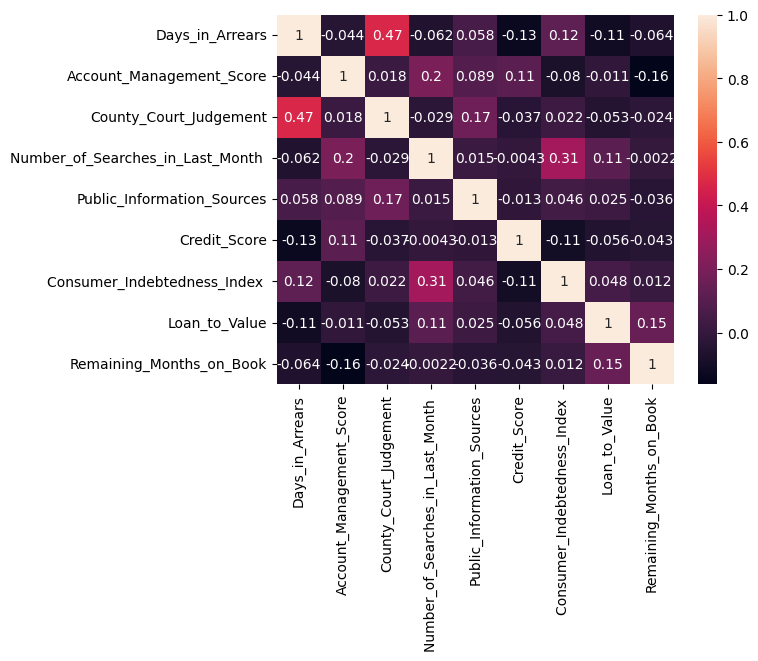

In [ ]:
#plotting corrmatrix
sns.heatmap(X.corr(), annot=True)
plt.show()

as all VIF < 10 and we don't see any major co-relation b/w variables we can say that none of the variables have an issue of multicollinearity

Lets scale the variables and make the PD model using logistic regression

In [ ]:
#making x and y and scaling the values

X = final_company_accounts[['Days_in_Arrears', 'Account_Management_Score','County_Court_Judgement','Number_of_Searches_in_Last_Month ', 'Public_Information_Sources','Credit_Score', 'Consumer_Indebtedness_Index ', 'Loan_to_Value',  'Remaining_Months_on_Book']]
y = final_company_accounts['default']


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

model_12_month = LogisticRegression()
model_12_month.fit(X_scaled, y)

# Predict 12-month PDs using scaled features
final_company_accounts['PD_12_month'] = model_12_month.predict_proba(X_scaled)[:, 1]


In [ ]:
# getting coefficients of the model
coefficients = model_12_month.coef_
intercept = model_12_month.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

feature_names = X.columns
for feature, coef in zip(feature_names, coefficients[0]):
  print(f"{feature}: {coef}")


Coefficients: [[ 1.78774017  0.4264077   0.24376481 -0.06672998 -0.37246343 -0.58858063
   0.07251159 -0.38778768 -0.36637488]]
Intercept: [-5.38993394]
Days_in_Arrears: 1.7877401702528408
Account_Management_Score: 0.4264076965249661
County_Court_Judgement: 0.24376481228964716
Number_of_Searches_in_Last_Month : -0.06672997997231957
Public_Information_Sources: -0.3724634256460976
Credit_Score: -0.5885806275690457
Consumer_Indebtedness_Index : 0.0725115873659647
Loan_to_Value: -0.387787676176058
Remaining_Months_on_Book: -0.366374884919387


The coefficients for all the variables look good and have impact as expected. Apart from Account_Management_Score which should have had a negative impact on PD, and Public_Information_Sources which should have had a positive impact on the PD. And Loan_to_Value should also have been positive and is negative.


In [ ]:
final_company_accounts[final_company_accounts['Stage']==1]

,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage,default,PD_12_month
1,123A054,2016-06-28,1,90,360,270,0,0.6032,56.0,786.0,0.0,8.0,0.0,74.000000,1,0,0.001844
6,123A425,2017-04-07,1,80,120,40,0,0.7563,78.0,1137.0,0.0,3.0,0.0,15.000000,1,0,0.001806
7,123A433,2016-06-29,1,90,240,150,30,0.6769,35.0,1155.5,0.0,0.0,0.0,21.000000,1,0,0.015143
8,123A599,2016-06-28,1,90,120,30,0,0.5858,14.0,1367.0,0.0,0.0,0.0,1.000000,1,0,0.014905
10,123A716,2016-12-21,1,84,120,36,0,0.5885,15.0,1385.5,0.0,0.0,0.0,13.000000,1,0,0.015119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,A051070,2022-03-31,1,21,120,99,0,0.7382,70.0,1037.5,0.0,1.0,0.0,17.000000,1,0,0.001892
1994,A050641,2022-03-29,1,21,240,219,0,0.6172,49.0,1145.0,0.0,0.0,0.0,9.152966,1,0,0.003009
1996,A051126,2022-03-25,1,21,240,219,0,0.7942,73.0,1217.0,0.0,0.0,0.0,5.000000,1,0,0.001023
1997,A051134,2022-04-01,1,20,300,280,0,0.6632,78.0,1377.5,0.0,1.0,0.0,2.000000,1,0,0.001184


Calculating lifetime PD for Stage 2 and 3

In [ ]:

stage_2_3_accounts = final_company_accounts[final_company_accounts['Stage'].isin([2, 3])]

stage_2_3_accounts['Remaining_Lifetime_Years'] = stage_2_3_accounts['Remaining_Months_on_Book'] / 12


lifetime_pds = []

# Loop through each loan to calculate its lifetime PD
for index, row in stage_2_3_accounts.iterrows():
    # using 12 month PD
    pd_12_month = row['PD_12_month']


    remaining_years = int(np.ceil(row['Remaining_Lifetime_Years']))


    survival_probability = 1


    for year in range(remaining_years):

        survival_probability *= (1 - pd_12_month)

    # Calculate the lifetime PD
    lifetime_pd = 1 - survival_probability
    lifetime_pds.append(lifetime_pd)


stage_2_3_accounts['PD_lifetime'] = lifetime_pds


stage_2_3_accounts


<ipython-input-68-58e5d2da9404>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_2_3_accounts['Remaining_Lifetime_Years'] = stage_2_3_accounts['Remaining_Months_on_Book'] / 12
<ipython-input-68-58e5d2da9404>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_2_3_accounts['PD_lifetime'] = lifetime_pds


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage,default,PD_12_month,Remaining_Lifetime_Years,PD_lifetime
0,123A038,2016-05-12,1,91,120,29,0,0.3663,5.0,1137.000000,0.0,0.0,0.0,13.921875,2,0,0.034990,2.416667,0.101341
5,123AA9,2016-12-21,1,84,120,36,30,0.4818,69.0,1259.666667,0.0,0.0,0.0,19.000000,2,0,0.022883,3.000000,0.067091
9,123A644,2016-07-18,1,89,120,31,23,0.3070,45.0,1195.666667,0.0,0.0,0.0,4.000000,2,0,0.045922,2.583333,0.131537
37,A4709,2016-11-15,1,85,120,35,35,0.7098,66.0,440.000000,42.0,0.0,1.0,13.921875,2,0,0.010502,2.916667,0.031176
73,A010535,2017-07-20,1,77,108,31,0,0.4006,100.0,1377.000000,0.0,0.0,0.0,2.000000,2,0,0.004742,2.583333,0.014158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,A050561,2022-03-25,1,21,120,99,30,0.6130,69.0,1083.000000,0.0,0.0,0.0,1.000000,2,0,0.009843,8.250000,0.085181
1957,A050617,2022-03-31,1,21,180,159,0,0.8022,60.0,1488.000000,0.0,3.0,0.0,5.000000,2,0,0.001667,13.250000,0.023090
1962,A050676,2022-03-30,1,21,300,279,0,0.7174,49.0,1179.500000,0.0,0.0,0.0,5.000000,2,0,0.001716,23.250000,0.040391
1971,A035265,2022-06-24,1,18,360,342,10,0.6844,36.0,-999.000000,-1.0,0.0,-1.0,13.921875,2,0,0.001060,28.500000,0.030283


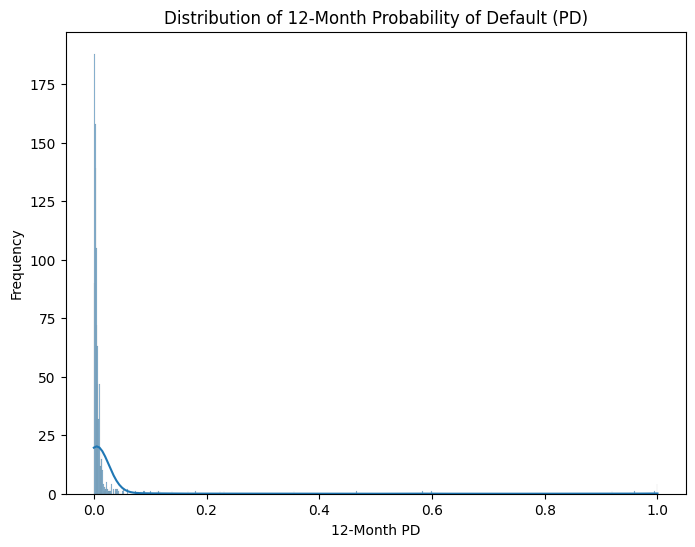

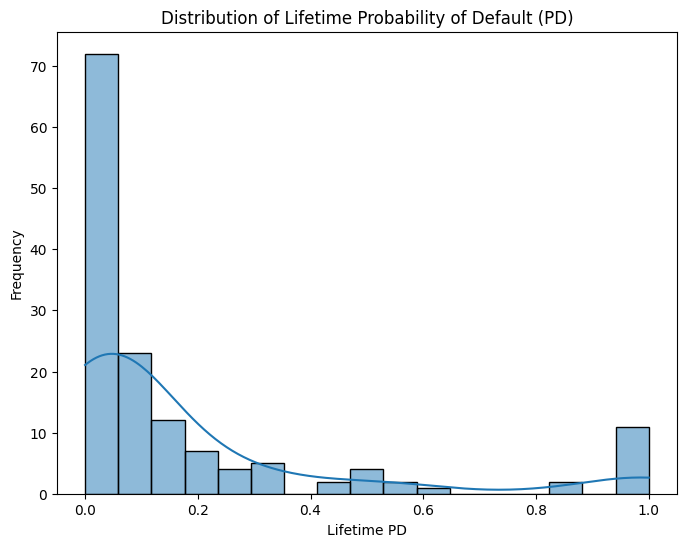

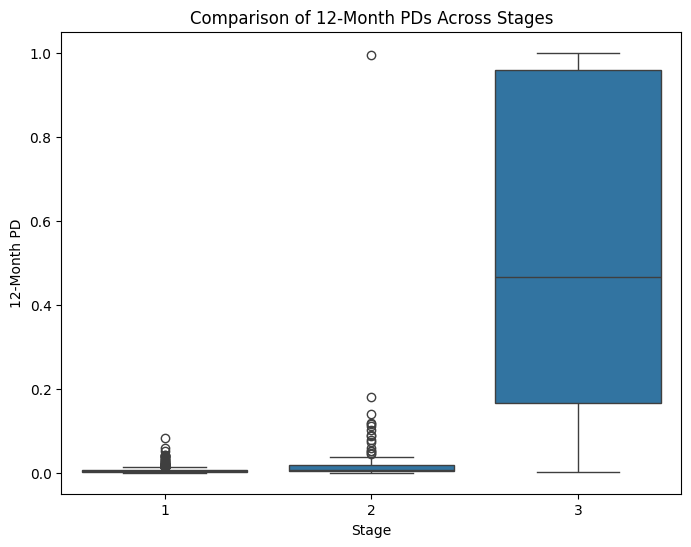

In [ ]:
# Visualize PD_12_month
plt.figure(figsize=(8, 6))
sns.histplot(final_company_accounts['PD_12_month'], kde=True)
plt.title('Distribution of 12-Month Probability of Default (PD)')
plt.xlabel('12-Month PD')
plt.ylabel('Frequency')
plt.show()

# Visualize PD_lifetime (only for Stage 2 and 3)
plt.figure(figsize=(8, 6))
sns.histplot(stage_2_3_accounts['PD_lifetime'], kde=True)
plt.title('Distribution of Lifetime Probability of Default (PD)')
plt.xlabel('Lifetime PD')
plt.ylabel('Frequency')
plt.show()

# box plots to compare PDs across different stages
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='PD_12_month', data=final_company_accounts)
plt.title('Comparison of 12-Month PDs Across Stages')
plt.xlabel('Stage')
plt.ylabel('12-Month PD')
plt.show()


# Individual Accounts PD model


In [ ]:
#  make default = 1 if in stage 2 and 3
final_individual_accounts['default'] = (final_individual_accounts['Stage'] == 3).astype(int)


<ipython-input-70-784728fe0a29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_individual_accounts['default'] = (final_individual_accounts['Stage'] == 3).astype(int)


In [ ]:
final_individual_accounts

,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage,default
3,123A150,2017-02-06,0,82,360,278,0,0.3748,1300.0,0.0,0.0,0.0,2.0,1,0
4,123A310,2016-06-08,0,90,300,210,30,0.5409,727.0,121.0,0.0,47.0,29.0,2,0
11,123A767,2016-09-23,0,87,240,153,0,0.6187,1426.0,0.0,1.0,0.0,6.0,1,0
14,A1620,2016-10-27,0,86,300,214,0,0.1866,1260.0,0.0,0.0,0.0,1.0,1,0
16,A1671,2016-09-08,0,87,96,9,0,0.5467,1321.0,0.0,0.0,0.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,A050764,2022-03-18,0,21,300,279,11,0.6769,1308.0,0.0,1.0,0.0,9.0,1,0
1976,A050860,2022-04-12,0,20,120,100,0,0.3127,1361.0,0.0,0.0,0.0,2.0,1,0
1977,A050887,2022-03-24,0,21,120,99,0,0.2993,1211.5,0.0,0.0,0.0,2.0,1,0
1985,A050975,2022-03-24,0,21,120,99,0,0.5909,1335.0,0.0,0.0,0.0,2.0,1,0


In [ ]:
# Check VIF for all features
X = final_individual_accounts[['Days_in_Arrears', 'Account_Management_Score', 'County_Court_Judgement',
             'Number_of_Searches_in_Last_Month ', 'Public_Information_Sources',
             'Consumer_Indebtedness_Index ', 'Loan_to_Value',
             'Months_on_Book','Remaining_Months_on_Book']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                             feature         VIF
0                    Days_in_Arrears    1.214174
1           Account_Management_Score   10.563788
2             County_Court_Judgement    1.147936
3  Number_of_Searches_in_Last_Month     1.462886
4         Public_Information_Sources    1.105339
5       Consumer_Indebtedness_Index     1.772110
6                      Loan_to_Value   12.220992
7                     Months_on_Book  111.608365
8           Remaining_Months_on_Book   68.985780


removing Months on book and checking again

In [ ]:
# Check VIF for selected features
X = final_individual_accounts[['Days_in_Arrears', 'Account_Management_Score', 'County_Court_Judgement',
             'Number_of_Searches_in_Last_Month ', 'Public_Information_Sources',
              'Consumer_Indebtedness_Index ', 'Loan_to_Value',
             'Remaining_Months_on_Book']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                             feature        VIF
0                    Days_in_Arrears   1.167910
1           Account_Management_Score   8.580925
2             County_Court_Judgement   1.147913
3  Number_of_Searches_in_Last_Month    1.459537
4         Public_Information_Sources   1.104190
5       Consumer_Indebtedness_Index    1.718431
6                      Loan_to_Value  10.620999
7           Remaining_Months_on_Book   2.714454


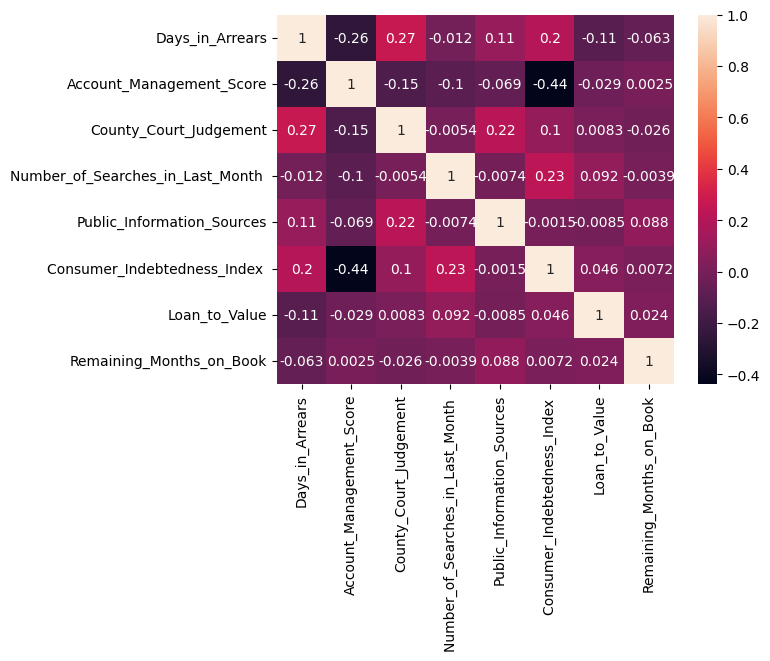

In [ ]:
#creating the correlation plots
sns.heatmap(X.corr(), annot=True)
plt.show()

as all VIF < 10 apart from Loan_to_Value being on the borderline and we don't see any major co-relation b/w variables we can say that none of the variables have an issue of multicollinearity

Lets scale the variables and make the PD model using logistic regression

In [ ]:
#making x and y and scaling the values

X = final_individual_accounts[['Days_in_Arrears', 'Account_Management_Score','County_Court_Judgement','Number_of_Searches_in_Last_Month ', 'Public_Information_Sources', 'Consumer_Indebtedness_Index ', 'Loan_to_Value',  'Remaining_Months_on_Book']]
y = final_individual_accounts['default']


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

model_12_month = LogisticRegression()
model_12_month.fit(X_scaled, y)

# Predict 12-month PDs using scaled features
final_individual_accounts['PD_12_month'] = model_12_month.predict_proba(X_scaled)[:, 1]


<ipython-input-75-7cdf26c71116>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_individual_accounts['PD_12_month'] = model_12_month.predict_proba(X_scaled)[:, 1]


In [ ]:
# getting the coefficients for the model
coefficients = model_12_month.coef_
intercept = model_12_month.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

feature_names = X.columns
for feature, coef in zip(feature_names, coefficients[0]):
  print(f"{feature}: {coef}")


Coefficients: [[ 0.82071457 -0.06759213  0.39453805 -0.48630753 -0.24308886  0.46916728
  -0.27430662 -1.18022776]]
Intercept: [-4.52224379]
Days_in_Arrears: 0.8207145691062494
Account_Management_Score: -0.06759213314364715
County_Court_Judgement: 0.3945380543857699
Number_of_Searches_in_Last_Month : -0.48630752847300984
Public_Information_Sources: -0.2430888636153823
Consumer_Indebtedness_Index : 0.4691672752563907
Loan_to_Value: -0.27430662354247404
Remaining_Months_on_Book: -1.180227763710588


Again as observed with Company Accounts data, The coefficients for all the variables look good and have impact as expected. Apart from  Public_Information_Sources which should have had a positive impact on the PD and Loan_to_Value should also have been positive and is negative.


In [ ]:
final_individual_accounts[final_individual_accounts['Stage']==1]

,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage,default,PD_12_month
3,123A150,2017-02-06,0,82,360,278,0,0.3748,1300.0,0.0,0.0,0.0,2.0,1,0,0.001689
11,123A767,2016-09-23,0,87,240,153,0,0.6187,1426.0,0.0,1.0,0.0,6.0,1,0,0.003950
14,A1620,2016-10-27,0,86,300,214,0,0.1866,1260.0,0.0,0.0,0.0,1.0,1,0,0.005778
16,A1671,2016-09-08,0,87,96,9,0,0.5467,1321.0,0.0,0.0,0.0,4.0,1,0,0.043715
17,A1751,2016-09-15,0,87,108,21,0,0.6170,1265.0,0.0,0.0,0.0,2.0,1,0,0.031103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,A050764,2022-03-18,0,21,300,279,11,0.6769,1308.0,0.0,1.0,0.0,9.0,1,0,0.000970
1976,A050860,2022-04-12,0,20,120,100,0,0.3127,1361.0,0.0,0.0,0.0,2.0,1,0,0.020316
1977,A050887,2022-03-24,0,21,120,99,0,0.2993,1211.5,0.0,0.0,0.0,2.0,1,0,0.021749
1985,A050975,2022-03-24,0,21,120,99,0,0.5909,1335.0,0.0,0.0,0.0,2.0,1,0,0.011623


Calculating lifetime PD for Stage 2 and 3

In [ ]:

stage_2_3_accounts = final_individual_accounts[final_individual_accounts['Stage'].isin([2, 3])]

stage_2_3_accounts['Remaining_Lifetime_Years'] = stage_2_3_accounts['Remaining_Months_on_Book'] / 12


lifetime_pds_ind = []

# Loop through each loan to calculate its lifetime PD
for index, row in stage_2_3_accounts.iterrows():

    pd_12_month = row['PD_12_month']

    remaining_years = int(np.ceil(row['Remaining_Lifetime_Years']))

    survival_probability = 1

    for year in range(remaining_years):

        survival_probability *= (1 - pd_12_month)

    # Calculate the lifetime PD
    lifetime_pd = 1 - survival_probability
    lifetime_pds_ind.append(lifetime_pd)


stage_2_3_accounts['PD_lifetime'] = lifetime_pds_ind

stage_2_3_accounts


<ipython-input-78-638125adcbc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_2_3_accounts['Remaining_Lifetime_Years'] = stage_2_3_accounts['Remaining_Months_on_Book'] / 12
<ipython-input-78-638125adcbc9>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage_2_3_accounts['PD_lifetime'] = lifetime_pds_ind


,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage,default,PD_12_month,Remaining_Lifetime_Years,PD_lifetime
4,123A310,2016-06-08,0,90,300,210,30,0.5409,727.000000,121.0,0.0,47.0,29.0,2,0,0.009981,17.500000,0.165205
21,A2017,2016-10-24,0,86,120,34,0,0.6000,1056.000000,0.0,1.0,0.0,57.0,2,0,0.081607,2.833333,0.225384
38,A4717,2016-09-15,0,87,120,33,7,0.2000,1249.000000,0.0,0.0,0.0,2.0,3,1,0.073916,2.750000,0.205761
40,A5672,2017-04-03,0,80,120,40,94,0.6980,-55.000000,-0.5,0.0,-1.0,13.0,2,0,0.326135,3.333333,0.793799
52,A8101,2016-12-22,0,84,120,36,0,0.5068,648.000000,0.0,0.0,0.0,38.0,2,0,0.091061,3.000000,0.249061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,A049018,2022-02-07,0,22,72,50,0,0.6071,862.000000,0.0,3.0,0.0,29.0,2,0,0.015063,4.166667,0.073082
1824,A049026,2022-01-21,0,23,300,277,0,0.6404,855.000000,86.0,0.0,68.0,2.0,2,0,0.000326,23.083333,0.007789
1884,A049763,2022-02-11,0,22,300,278,0,0.7422,823.000000,0.0,0.0,0.0,74.0,2,0,0.006165,23.166667,0.137931
1906,A050641,2022-02-25,0,22,120,98,0,0.6763,1089.333333,0.0,4.0,0.0,62.0,2,0,0.010978,8.166667,0.094577


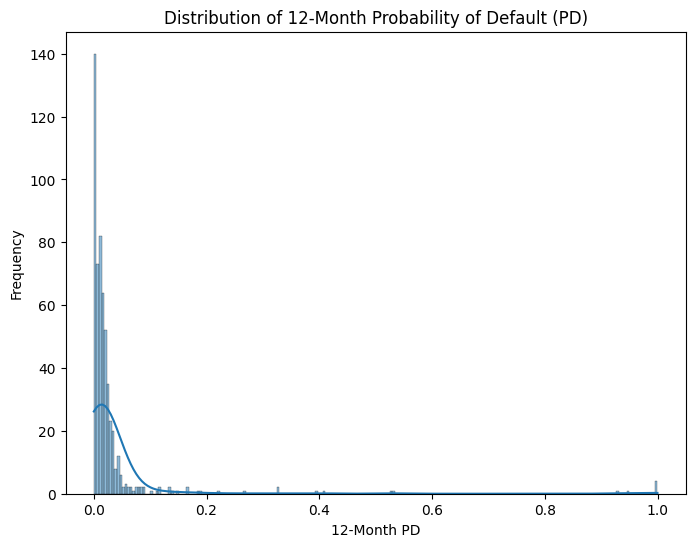

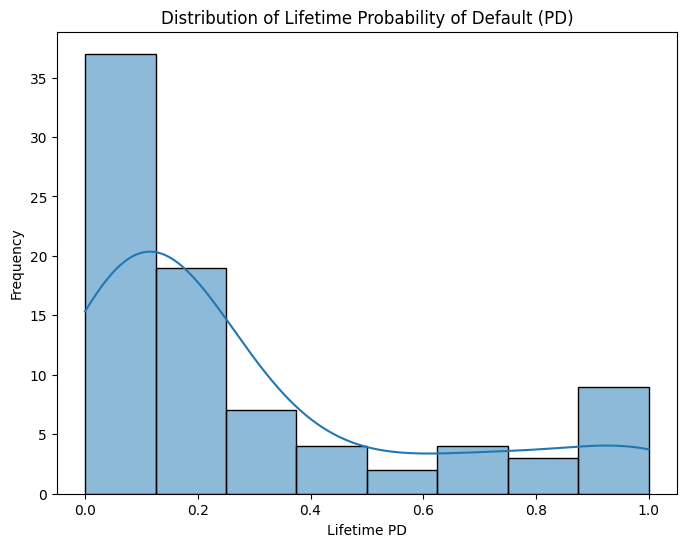

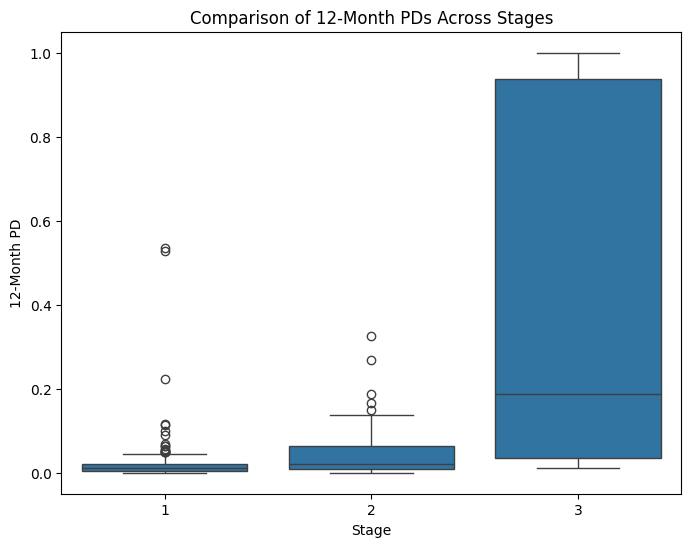

In [ ]:
# Visualize PD_12_month
plt.figure(figsize=(8, 6))
sns.histplot(final_individual_accounts['PD_12_month'], kde=True)
plt.title('Distribution of 12-Month Probability of Default (PD)')
plt.xlabel('12-Month PD')
plt.ylabel('Frequency')
plt.show()

# Visualize PD_lifetime (only for Stage 2 and 3)
plt.figure(figsize=(8, 6))
sns.histplot(stage_2_3_accounts['PD_lifetime'], kde=True)
plt.title('Distribution of Lifetime Probability of Default (PD)')
plt.xlabel('Lifetime PD')
plt.ylabel('Frequency')
plt.show()

# box plots to compare PDs across different stages
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='PD_12_month', data=final_individual_accounts)
plt.title('Comparison of 12-Month PDs Across Stages')
plt.xlabel('Stage')
plt.ylabel('12-Month PD')
plt.show()
